<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/Imdb_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((25000,), (25000,), (25000,), (25000,))

In [3]:
print(type(x_train))
print(type(x_train[0]), x_train[0])

<class 'numpy.ndarray'>
<class 'list'> [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
len(x_train[0])

218

In [5]:
(x_train_100, y_train_100),(x_test_100, y_test_100) = tf.keras.datasets.imdb.load_data(num_words=100)
x_train_100.shape, y_train_100.shape,x_test_100.shape, y_test_100.shape

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((25000,), (25000,), (25000,), (25000,))

In [6]:
print(type(x_train_100[0]), x_train_100[0])

<class 'list'> [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 2, 36, 2, 5, 25, 2, 43, 2, 2, 50, 2, 2, 9, 35, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 39, 4, 2, 2, 2, 17, 2, 38, 13, 2, 4, 2, 50, 16, 6, 2, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 2, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 2, 12, 16, 38, 2, 5, 25, 2, 51, 36, 2, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 2, 2, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 2, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 2, 6, 2, 2, 18, 4, 2, 22, 21, 2, 2, 26, 2, 5, 2, 30, 2, 18, 51, 36, 28, 2, 92, 25, 2, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 2, 2, 32, 15, 16, 2, 19, 2, 32]


In [7]:
print(type(y_train))
print(type(y_train[0]), y_train[0:5])

<class 'numpy.ndarray'>
<class 'numpy.int64'> [1 0 0 1 0]


In [8]:
import numpy as np

In [9]:
np.unique(y_train)

array([0, 1])

In [10]:
word_index = tf.keras.datasets.imdb.get_word_index()
# print(type(word_index), word_index)

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
# word_index.items()

In [12]:
invert_word_index = dict()

for (key, value) in word_index.items():
  invert_word_index[value] = key

# print(invert_word_index)

In [13]:
decode_str = str()

for num in x_train[0]:

  # print(num, invert_word_index[num])
  decode_str = decode_str + invert_word_index[num]+' '

decode_str

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [14]:
decode_str = str()

for num in x_train[20]:

  # print(num, invert_word_index[num])
  decode_str = decode_str + invert_word_index[num]+' '

decode_str

"the running this lily movie and as monster do on it her do for have lost and to one in character that in of here out in can what that after also think entire to that end of using it her straight that horror keep who is during doing and silly of oscar he surprisingly not and still been of and to of love it mouth i i of and and horror in one will forth or of remarkably and br and and more nothing himself in at is four i've less this of script on i i was although as on in at her do for was mediocre its br of too i'm i i albums zany real thirty be yes this dramatic all city street of sense "

In [15]:
def f_decode_str(x_data):

  decode_str = str()

  for num in x_data:
    # print(num, invert_word_index[num])
    decode_str = decode_str + invert_word_index[num]+' '

  return decode_str

In [16]:
f_decode_str(x_train[20])

"the running this lily movie and as monster do on it her do for have lost and to one in character that in of here out in can what that after also think entire to that end of using it her straight that horror keep who is during doing and silly of oscar he surprisingly not and still been of and to of love it mouth i i of and and horror in one will forth or of remarkably and br and and more nothing himself in at is four i've less this of script on i i was although as on in at her do for was mediocre its br of too i'm i i albums zany real thirty be yes this dramatic all city street of sense "

In [17]:
f_decode_str(x_train_100[20])

'the and this and movie and as and do on it her do for have and and to one in and that in of and out in can what that and also and and to that and of and it her and that and and who is and and and and of and he and not and and been of and to of and it and i i of and and and in one will and or of and and br and and more and and in at is and and and this of and on i i was and as on in at her do for was and its br of too and i i and and and and be and this and all and and of and '

# 데이터 전처리 작업

In [18]:
len(x_train[0]), len(x_train[50]) , len(x_train[500]), len(x_train[1000])

(218, 113, 60, 298)

In [19]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[500]), pad_x_train[500]

(500, array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [20]:
np.unique(y_train) #Dense :1, activation:sigmoid, loss : binary_crossentropy

array([0, 1])

# make model

In [21]:
model = tf.keras.Sequential()

In [22]:
model.add(tf.keras.layers.Embedding(input_dim = 10000 , output_dim = 24, input_length=500))

In [23]:
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))

In [24]:
model.add(tf.keras.layers.Dense(1, activation= 'sigmoid'))

In [25]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy' , metrics=['acc'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 24)           240000    
_________________________________________________________________
lstm (LSTM)                  (None, 500, 24)           4704      
_________________________________________________________________
lstm_1 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 246,493
Trainable params: 246,493
Non-trainable params: 0
_________________________________________________________________


# training

In [27]:
his = model.fit(pad_x_train, y_train , epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
69/69 [==============================] - 56s 754ms/step - loss: 0.5874 - acc: 0.6880 - val_loss: 0.4460 - val_acc: 0.8041
Epoch 2/100
69/69 [==============================] - 51s 737ms/step - loss: 0.3305 - acc: 0.8738 - val_loss: 0.3477 - val_acc: 0.8583
Epoch 3/100
69/69 [==============================] - 51s 734ms/step - loss: 0.2295 - acc: 0.9226 - val_loss: 0.3142 - val_acc: 0.8733
Epoch 4/100
69/69 [==============================] - 51s 738ms/step - loss: 0.1780 - acc: 0.9447 - val_loss: 0.3292 - val_acc: 0.8691
Epoch 5/100
69/69 [==============================] - 51s 737ms/step - loss: 0.1362 - acc: 0.9607 - val_loss: 0.3470 - val_acc: 0.8748
Epoch 6/100
69/69 [==============================] - 51s 733ms/step - loss: 0.1117 - acc: 0.9696 - val_loss: 0.4026 - val_acc: 0.8719
Epoch 7/100
69/69 [==============================] - 51s 736ms/step - loss: 0.0956 - acc: 0.9753 - val_loss: 0.4221 - val_acc: 0.8508
Epoch 8/100
69/69 [==============================] - 51s 737ms

# evaluation

In [28]:
model.evaluate(pad_x_train, y_train)

782/782 [==============================] - 49s 63ms/step - loss: 0.2584 - acc: 0.9562


[0.25843656063079834, 0.9562399983406067]

In [29]:
# len(x_test[20])

In [30]:
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [31]:
len(pad_x_test[20])

500

In [32]:
model.evaluate(pad_x_test)

782/782 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


[0.0, 0.0]

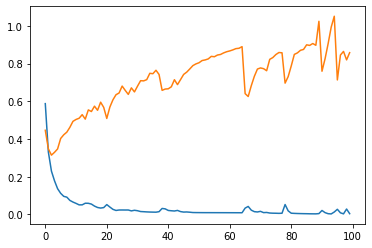

In [33]:
import matplotlib.pyplot as plt

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()